# Machine Learning on ADS

### Fitting Model With XGBoost

Importing libraries and then the file

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

Reading the dataset and splitting it into X and y

In [2]:
dataset = pd.read_csv('ADS_Chappa_Out.csv')
df = dataset.copy()
df.drop('Unnamed: 0', axis=1, inplace=True)
X = df.drop('CUSTOMER_ID',axis=1)
X = X.drop('CHURN', axis=1)
X = X.values
y = df['CHURN'].values

Splitting the Data into training set and test set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Fitting XGBoost on the Training Set

In [54]:
from xgboost import XGBClassifier
import xgboost as xgb
classifier = XGBClassifier(n_jobs=-1)
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

Making Predictions

In [5]:
y_pred = classifier.predict(X_test)

Evaluating the Model

In [6]:
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_recall_curve, precision_score
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 1480  3930]
 [  797 33793]]


In [7]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10, n_jobs=-1)

mean_accuracy = accuracies.mean()
print('mean accuracy:')
print(mean_accuracy)

mean accuracy:
0.8818812494230712


In [8]:
std_accuracy = accuracies.std()
print('standard deviation of accuracies:')
print(std_accuracy)

standard deviation of accuracies:
0.002029396878963316


Plotting the ROC curve

In [9]:
def plot_roc_curve(fpr,tpr, label=None):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([-0.005,1,0,1.005])
    plt.xticks(np.arange(0,1,0.05), rotation=90)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='best')

In [10]:
y_pred_prob = classifier.predict_proba(X_test)[:,1]

              precision    recall  f1-score   support

           0       0.65      0.27      0.39      5410
           1       0.90      0.98      0.93     34590

   micro avg       0.88      0.88      0.88     40000
   macro avg       0.77      0.63      0.66     40000
weighted avg       0.86      0.88      0.86     40000



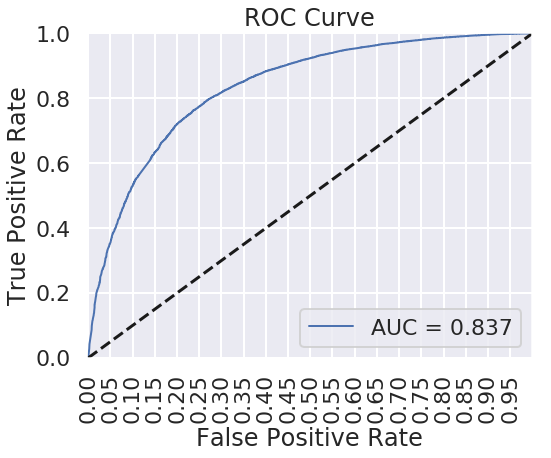

In [11]:
from sklearn.metrics import recall_score, classification_report, f1_score, roc_curve, auc
print(classification_report(y_test, y_pred))
sns.set_context('poster')
auc_dt = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, threshold = roc_curve(y_test,y_pred_prob)
plot_roc_curve(fpr, tpr, label='AUC = %0.3f'%auc_dt)

Feature Importance

Text(0.5,1,'xgboost classifier, feature importance')

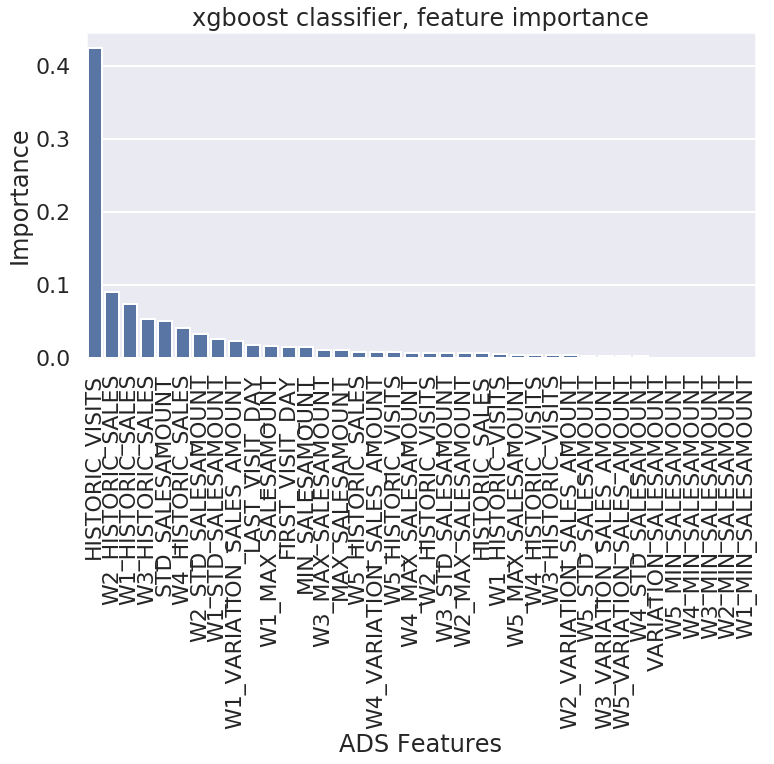

In [12]:
X = df.drop(['CUSTOMER_ID','CHURN'],axis=1)
features_tuple=list(zip(X.columns,classifier.feature_importances_))
feature_imp = pd.DataFrame(features_tuple,columns=['Feature Names','Importance'])
feature_imp = feature_imp.sort_values('Importance',ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x='Feature Names', y='Importance', data=feature_imp,color='b')
plt.xlabel('ADS Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.title('xgboost classifier, feature importance')

### Fitting the model with RandomForrestClassifier

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
classifier_RF = RandomForestClassifier(max_depth=4)
classifier_RF.fit(X_train, y_train)

/home/usama/.local/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [17]:
rf_pred = classifier_RF.predict(X_test)
rf_pred_prb=classifier_RF.predict_proba(X_test)[:,1]

Calculating the Accuracy of the Model

In [18]:
accuracy_rf = accuracy_score(y_test,rf_pred)
print("Accuracy: {}".format(accuracy_rf))

Accuracy: 0.880225


Classification Report of the model

In [19]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.67      0.22      0.33      5410
           1       0.89      0.98      0.93     34590

   micro avg       0.88      0.88      0.88     40000
   macro avg       0.78      0.60      0.63     40000
weighted avg       0.86      0.88      0.85     40000



ROC Curve

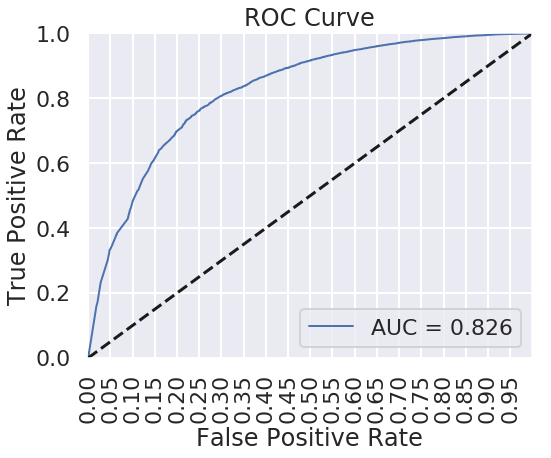

In [21]:
auc_rf=roc_auc_score(y_test,rf_pred_prb)
fpr,tpr,threshold=roc_curve(y_test,rf_pred_prb)
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_rf)

Finding Feature importance for RandomForrestClassifier

In [22]:
features_tuple=list(zip(X.columns,classifier_RF.feature_importances_))

In [23]:
feature_imp=pd.DataFrame(features_tuple,columns=["Feature Names","Importance"])

In [24]:
feature_imp=feature_imp.sort_values("Importance",ascending=False)

Text(0.5,1,'Random Forest Classifier - Features Importance')

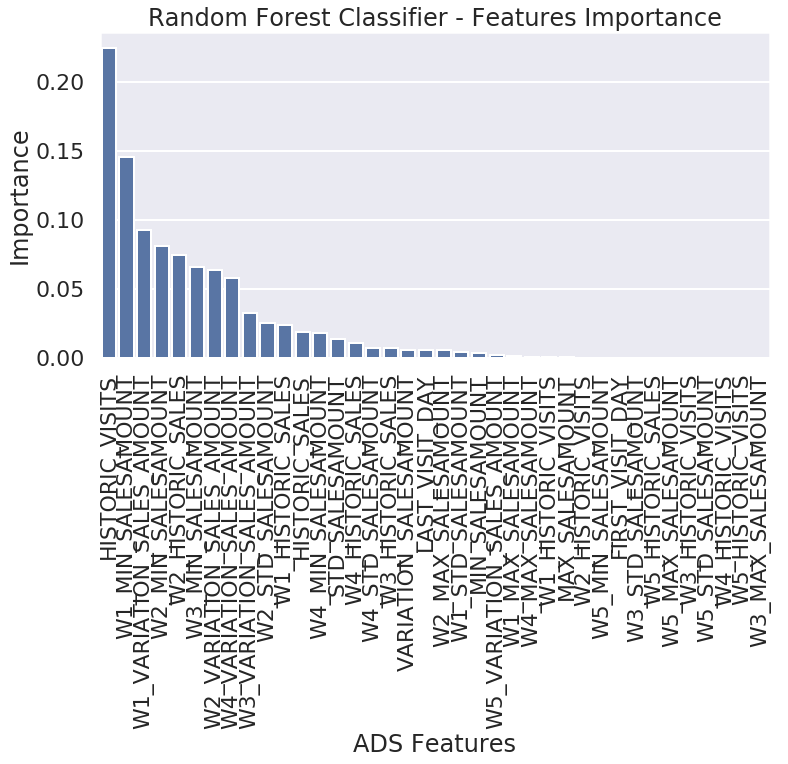

In [26]:
plt.figure(figsize=(12,6))
sns.barplot(x="Feature Names",y="Importance", data=feature_imp, color='b')
plt.xlabel("ADS Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.title("Random Forest Classifier - Features Importance")

### Hyper-Parameter Tuning With GridSearchCV for RandomForrestClassifier

Importing GridSearchCV

In [27]:
from sklearn.model_selection import GridSearchCV

In [30]:
param_grid1 = {"n_estimators" : [9, 18, 27],
           "max_depth" : [1, 5, 10],
           "min_samples_leaf" : [1, 2, 4, 6]}
RF = RandomForestClassifier()
# Instantiate the GridSearchCV object: logreg_cv
RF_cv1 = GridSearchCV(RF, param_grid1, cv=5,scoring='roc_auc',n_jobs=-1)

# Fit it to the data
RF_cv1.fit(X_train,y_train)

#RF_cv1.grid_scores_, 
RF_cv1.best_params_, RF_cv1.best_score_

({'max_depth': 10, 'min_samples_leaf': 4, 'n_estimators': 27},
 0.837452445906132)

In [36]:
param_grid2 = {"n_estimators" : [23, 27, 35, 43],
           "max_depth" : [8, 10, 15],
           "min_samples_leaf" : [3, 4, 5]}
RF = RandomForestClassifier()
# Instantiate the GridSearchCV object: logreg_cv
RF_cv2 = GridSearchCV(RF, param_grid2, cv=5,scoring='roc_auc', n_jobs=-1)

# Fit it to the data
RF_cv2.fit(X_train,y_train)

#RF_cv1.grid_scores_, 
RF_cv2.best_params_, RF_cv2.best_score_

/home/usama/.local/lib/python3.5/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/home/usama/.local/lib/python3.5/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/home/usama/.local/lib/python3.5/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/home/usama/.local/lib/python3.5/site-packages/sklearn/externals/joblib/externals/loky/process

({'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 43},
 0.8376079651875381)

In [38]:
param_grid3 = {"n_estimators" : [40, 43, 53],
           "max_depth" : [10, 11],
           "min_samples_leaf" : [4, 5, 6]}
RF = RandomForestClassifier()
# Instantiate the GridSearchCV object: logreg_cv
RF_cv3 = GridSearchCV(RF, param_grid3, cv=4,scoring='roc_auc', n_jobs=-1)

# Fit it to the data
RF_cv3.fit(X_train,y_train)

#RF_cv1.grid_scores_, 
RF_cv3.best_params_, RF_cv3.best_score_

({'max_depth': 10, 'min_samples_leaf': 6, 'n_estimators': 53},
 0.8374970584197255)

Best Score was of Paramgrid2. Therefore we will use that in tuning

### Tuning RandomForrestClassifier with new Parameter

In [39]:
RF_tuned = RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=43)
RF_tuned.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=43, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [40]:
rf_pred_t = RF_tuned.predict(X_test)
rf_pred_prb_t=RF_tuned.predict_proba(X_test)[:,1]

In [42]:
accuracy_rf_t = accuracy_score(y_test,rf_pred_t)
print("Accuracy affter tuning: {}".format(accuracy_rf_t))

Accuracy affter tuning: 0.88125


In [43]:
print(classification_report(y_test,rf_pred_t))

              precision    recall  f1-score   support

           0       0.65      0.27      0.38      5410
           1       0.89      0.98      0.93     34590

   micro avg       0.88      0.88      0.88     40000
   macro avg       0.77      0.62      0.66     40000
weighted avg       0.86      0.88      0.86     40000



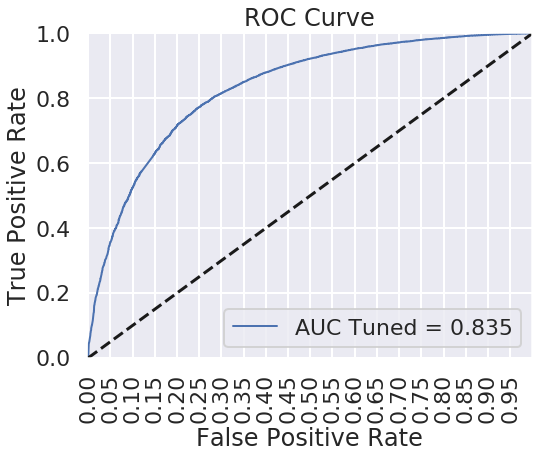

In [44]:
auc_rf_t=roc_auc_score(y_test,rf_pred_prb_t)
fpr,tpr,threshold=roc_curve(y_test,rf_pred_prb_t)
plot_roc_curve(fpr,tpr,label='AUC Tuned = %0.3f'% auc_rf_t)

In [45]:
RF_dict = {"Algorithm":["Random Forest","Random Forest"],"Action":["First Run","Tuned"],
           "Accuracy":[accuracy_rf,accuracy_rf_t],"AUC":[auc_rf,auc_rf_t]}
comparison=pd.DataFrame(RF_dict)
comparison

,AUC,Accuracy,Action,Algorithm
0,0.825624,0.880225,First Run,Random Forest
1,0.834957,0.881250,Tuned,Random Forest


In [46]:
print("Difference in Accuracy is: %0.3f"%((comparison.loc[1,'Accuracy']-comparison.loc[0,'Accuracy'])*100))
print("Difference in AUC is: %0.3f"%((comparison.loc[1,'AUC']-comparison.loc[0,'AUC'])*100))

Difference in Accuracy is: 0.102
Difference in AUC is: 0.933


### Applying GridSearchCV on XGBoost

In [55]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)

In [56]:
def modelfit(alg, dtrain, xtrain, xtest, ytrain, ytest,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param=alg.get_params()
        cv_result=xgb.cv(xgb_param,dtrain,num_boost_round=alg.get_params()['n_estimators'],nfold=cv_folds,metrics={'auc'},
                     early_stopping_rounds=early_stopping_rounds,seed=25)
        alg.set_params(n_estimators=cv_result.shape[0])
        print("n_estimators : ",alg.get_params()['n_estimators'])
    
    #fit algorithm on data
    alg.fit(xtrain,ytrain)
    pred=alg.predict(xtest)
    predprob=alg.predict_proba(xtest)[:,1]
    
    print ("\nModel Report")
    print ("Accuracy(Test) : %.4g" % accuracy_score(ytest, pred))
    print ("AUC Score(Test) : %f" % roc_auc_score(ytest, predprob))

In [57]:
xgb1=XGBClassifier(learning_rate =0.01,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=-1,
 seed=25)

In [58]:
modelfit(xgb1,dtrain, X_train, X_test,y_train,y_test)

n_estimators :  1000

Model Report
Accuracy(Test) : 0.8827
AUC Score(Test) : 0.837797


In [65]:
param_test1 = {
 'max_depth': range(1,5),
 'min_child_weight':range(10)
}

gsearch1 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.001, n_estimators=80, max_depth=5,
 min_child_weight=1, gamma=0.0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=25), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=-1,iid=False, cv=4)

gsearch1.fit(X_train,y_train)

#gsearch1.grid_scores_, 
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 4, 'min_child_weight': 9}, 0.8314355570612775)

In [67]:
param_test2 = {
 'max_depth':[3,4,5],
 'min_child_weight':[9,10,11]
}

gsearch2 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=142, max_depth=4,
 min_child_weight=9, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=25), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=-1,iid=False, cv=4)

gsearch2.fit(X_train,y_train)

gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 4, 'min_child_weight': 9}, 0.8399417269825386)

In [70]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,7)]
}

gsearch3 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=142, max_depth=4,
 min_child_weight=9, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=-1, scale_pos_weight=1, seed=25), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=-1,iid=False, cv=4)

gsearch3.fit(X_train,y_train)

gsearch3.best_params_, gsearch3.best_score_

({'gamma': 0.4}, 0.8401155505463029)

In [71]:
xgb2=xgb.XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=9,
 gamma=0.4,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 seed=25)

In [72]:
modelfit(xgb2,dtrain, X_train, X_test,y_train,y_test)

n_estimators :  133

Model Report
Accuracy(Test) : 0.8823
AUC Score(Test) : 0.837603


In [75]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,11)],
 'colsample_bytree':[i/10.0 for i in range(6,11)]
}

gsearch4 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=133, max_depth=4,
 min_child_weight=9, gamma=0.4, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=-1, scale_pos_weight=1, seed=25), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=-1,iid=False, cv=4)

gsearch4.fit(X_train,y_train)

gsearch4.best_params_, gsearch4.best_score_

({'colsample_bytree': 0.6, 'subsample': 0.7}, 0.8402214906672462)

In [77]:
param_test6 = {
 'reg_alpha':[0.1, 1, 2,0,5,10,20,50,100]
}

gsearch6 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=133, max_depth=4,
 min_child_weight=9, gamma=0.4, subsample=0.7, colsample_bytree=0.6,
 objective= 'binary:logistic', nthread=-1, scale_pos_weight=1, seed=25), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=-1,iid=False, cv=4)

gsearch6.fit(X_train,y_train)

gsearch6.best_params_, gsearch6.best_score_

({'reg_alpha': 0}, 0.8402214906672462)

In [78]:
xgb3=xgb.XGBClassifier(learning_rate =0.01,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=9,
 gamma=0.4,
 subsample=0.7,
 colsample_bytree=0.6,
 reg_alpha=0,
 objective= 'binary:logistic',
 nthread=4,
 seed=25)

In [79]:
modelfit(xgb3,dtrain, X_train, X_test, y_train, y_test)

n_estimators :  1000

Model Report
Accuracy(Test) : 0.8824
AUC Score(Test) : 0.837803


In [81]:
xgb4=xgb.XGBClassifier(learning_rate =0.01,
 n_estimators=133,
 max_depth=4,
 min_child_weight=9,
 gamma=0.4,
 subsample=0.7,
 colsample_bytree=0.6,
 reg_alpha=0,
 objective= 'binary:logistic',
 nthread=-1,
 seed=25)

In [83]:
xgb4.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0.4, learning_rate=0.01,
       max_delta_step=0, max_depth=4, min_child_weight=9, missing=None,
       n_estimators=133, n_jobs=1, nthread=-1, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=25, silent=True, subsample=0.7)

In [84]:
xgb_pred_t = xgb4.predict(X_test)
xgb_pred_prb_t = xgb4.predict_proba(X_test)[:,1]

In [85]:
accuracy_xgb_t = accuracy_score(y_test,xgb_pred_t)
print("Accuracy: {}".format(accuracy_xgb_t))

Accuracy: 0.88095


In [87]:
print(classification_report(y_test,xgb_pred_t))

              precision    recall  f1-score   support

           0       0.66      0.24      0.36      5410
           1       0.89      0.98      0.93     34590

   micro avg       0.88      0.88      0.88     40000
   macro avg       0.78      0.61      0.65     40000
weighted avg       0.86      0.88      0.86     40000



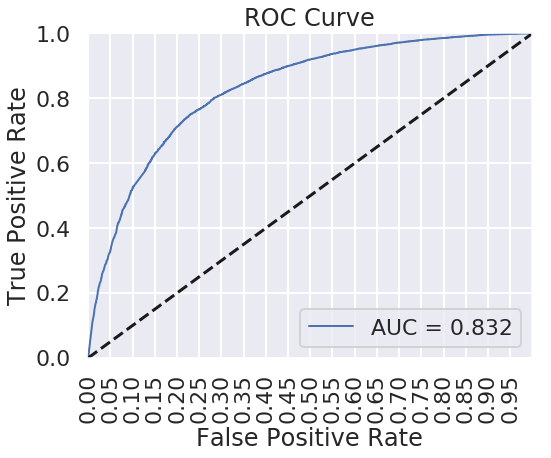

In [88]:
auc_xgb_t=roc_auc_score(y_test,xgb_pred_prb_t)
fpr,tpr,threshold=roc_curve(y_test,xgb_pred_prb_t)
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_xgb_t)